In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

## Data Cleaning

In [2]:
# Read Data
data = pd.read_csv("SampleSuperstore.csv")

data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are no null values in the data file and all data types are okay.

In [5]:
# check duplicates
data.duplicated().sum()

17

In [6]:
# check duplicated values
data[data.duplicated(keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


There are duplicated values

In [7]:
# drop duplicated values
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(9977, 13)

In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
data['Country'].unique()

array(['United States'], dtype=object)

In [11]:
# drop useless features like country because it contain only US and postal code
data.drop(['Country', 'Postal Code'], axis=1,inplace=True)

In [12]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
data.to_csv("SampleSuperstoreCleaned.csv", index=False)

## Analyze Profitability by Region

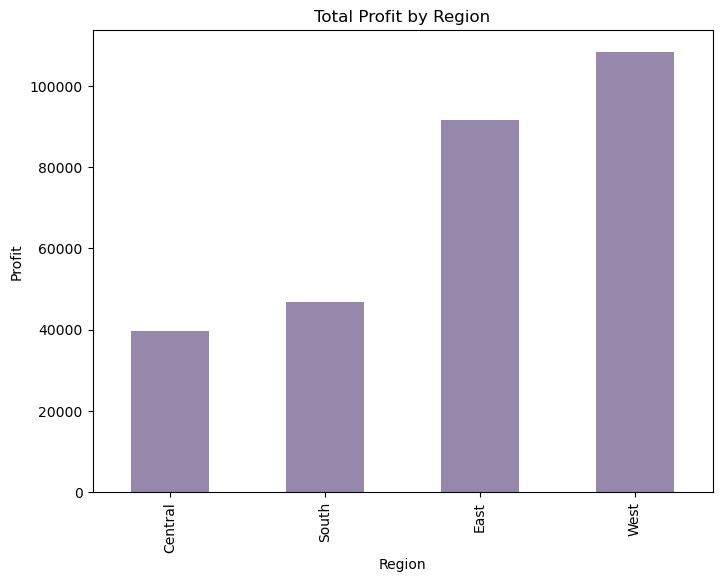

In [15]:
region_profit = data.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='bar', color='#9588AB', figsize=(8, 6))
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()


We can see that the **Central** region is the **least** profitable

## Analyze Profitability by Category

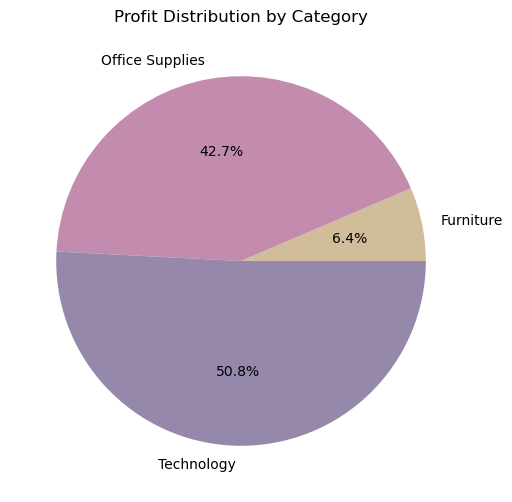

In [16]:
category_profit = data.groupby('Category')['Profit'].sum()
category_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['#D2BD9A', '#C38CAE', '#9588AB'])
plt.title('Profit Distribution by Category')
plt.ylabel('')
plt.show()


We can see that the **Furniture** category is the **least** profitable

## Analyze Profitability by ship mode

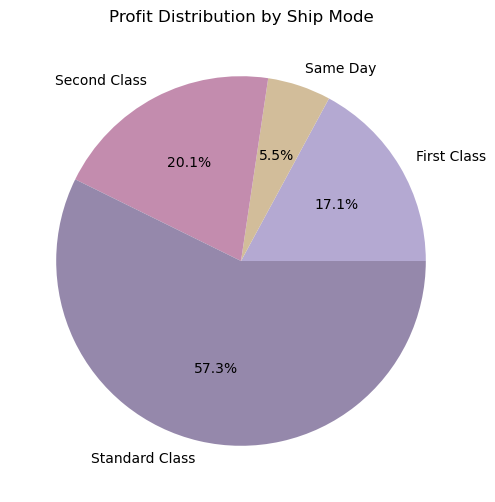

In [17]:
mode_profit = data.groupby('Ship Mode')['Profit'].sum()
mode_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=["#B4A9D2", "#D2BD9A", "#C38CAE","#9588AB"])
plt.title('Profit Distribution by Ship Mode')
plt.ylabel('')
plt.show()

We can see that the **Same Day** Ship Mode is the **least** profitable

## Discount Impact on Profit

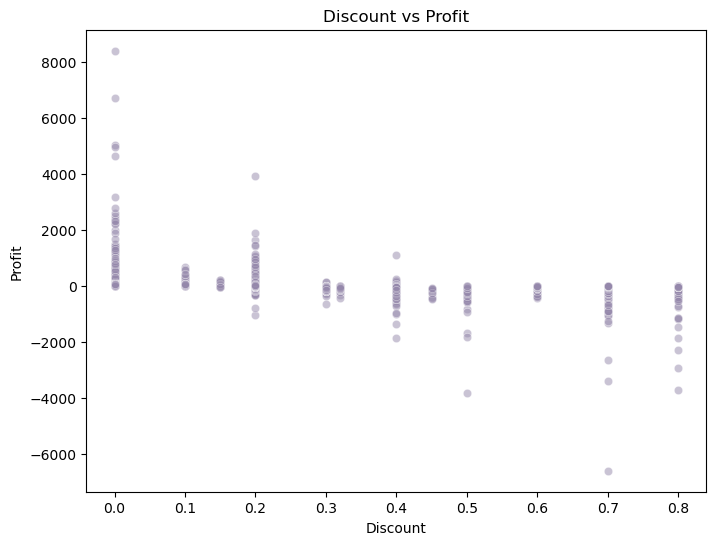

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Discount'], y=data['Profit'], alpha=0.5, color='#9588AB')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

## Top and Bottom States by Profit

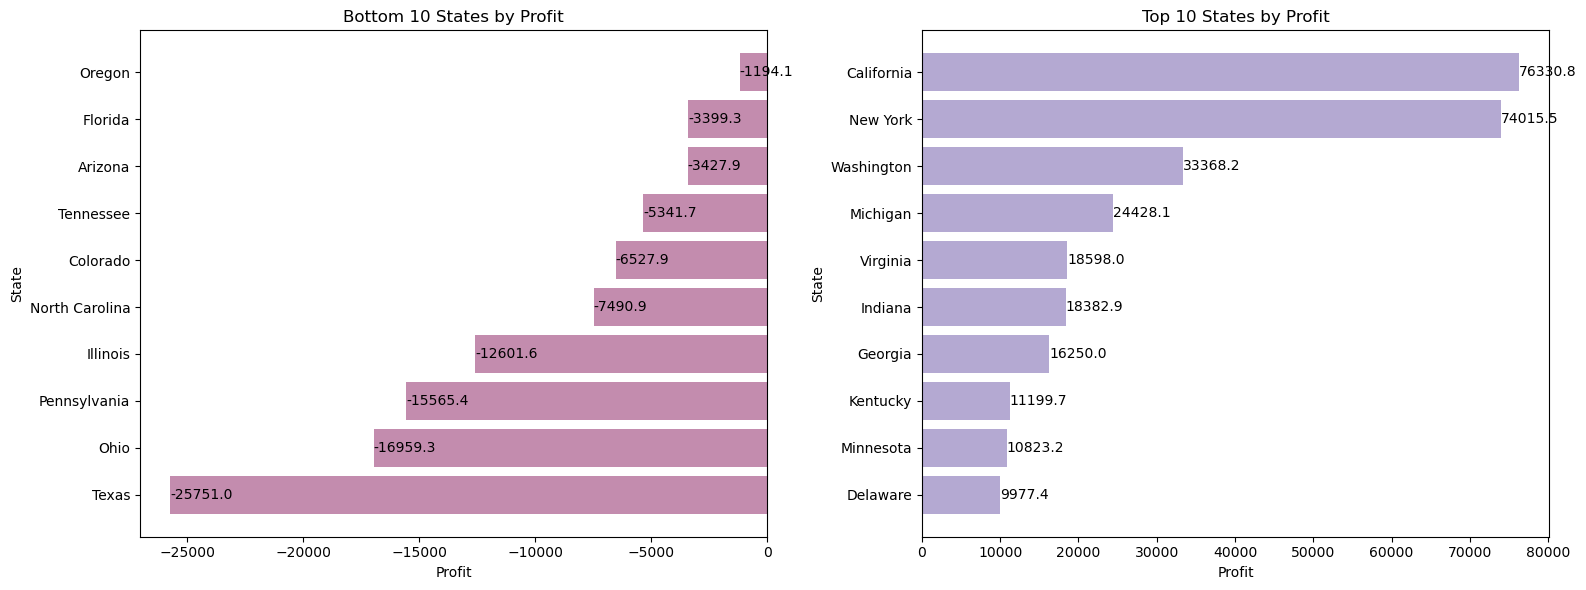

In [19]:
state_profit = data.groupby('State')['Profit'].sum().sort_values()

# Prepare the data
bottom_10 = state_profit.head(10)
top_10 = state_profit.tail(10)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

# Bottom 10 States
axes[0].barh(bottom_10.index, bottom_10.values, color='#C38CAE')
axes[0].set_title('Bottom 10 States by Profit')
axes[0].set_xlabel('Profit')
axes[0].set_ylabel('State')

# Add data labels
for index, value in enumerate(bottom_10):
    axes[0].text(value, index, f'{value:.1f}', va='center')

# Top 10 States
axes[1].barh(top_10.index, top_10.values, color='#B4A9D2')
axes[1].set_title('Top 10 States by Profit')
axes[1].set_xlabel('Profit')
axes[1].set_ylabel('State')

# Add data labels
for index, value in enumerate(top_10):
    axes[1].text(value, index, f'{value:.1f}', va='center')

# Adjust layout and display
plt.tight_layout()
plt.show()


We can see that **Texas** is the **least** profitable state and **California** is the **most** profitable state

## Category vs. Sub-Category Profit Analysis

c:\Users\Malak\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



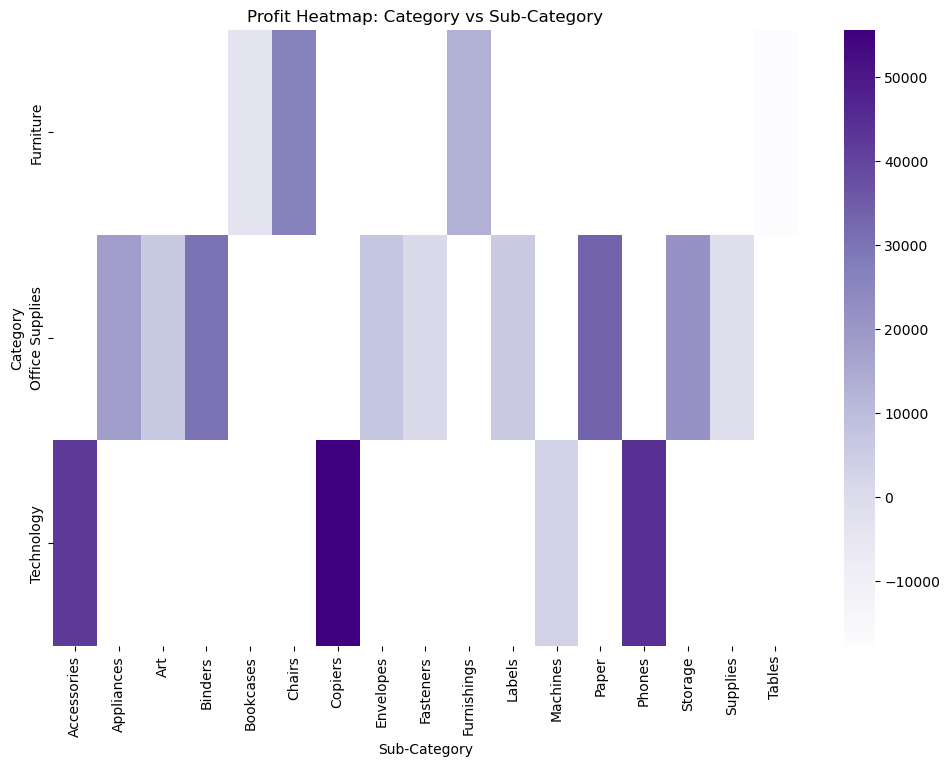

In [25]:
category_subcategory_profit = data.pivot_table(index='Category', columns='Sub-Category', values='Profit', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(category_subcategory_profit, cmap='Purples', annot=True, fmt='.0f')
plt.title('Profit Heatmap: Category vs Sub-Category')
plt.show()


## Sales by ship mode

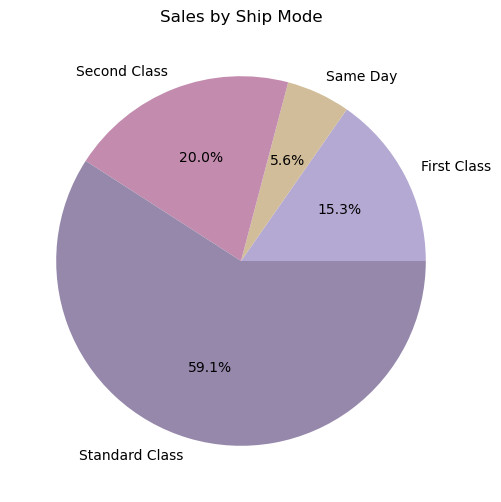

In [ ]:
mode_profit = data.groupby('Ship Mode')['Sales'].sum()
mode_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=["#B4A9D2", "#D2BD9A", "#C38CAE","#9588AB"])
plt.title('Sales by Ship Mode')
plt.ylabel('')
plt.show()

We can see that the **Same Day** Ship Mode is the **least** Sales

In [22]:
color_scale = ["#F4922A","#F5A197", "#2D7D85", "#B88DF5"]

fig = px.sunburst(data, path=['Ship Mode', 'Category',"Sub-Category"], values='Sales', color='Ship Mode',
                  color_discrete_sequence=color_scale)
fig.update_traces(textfont_size=14)
fig.update_layout(width=800, height=800)
fig.show()

•	In the **standard class**, Phones are the most sold products.

•	In the **second class and same day** shipping we can see that chairs are the ones that are normally shipped by that means.

•	In the **first class**, technology products are the most sold products.

## Conclusion

•	Regional Performance:
1.	Central region exhibits the lowest profitability, demanding immediate operational and sales strategy optimization.
2.	West region and Vermont state demonstrate high profitability, suggesting replicable success models for other areas.

•	Category Performance:
1.	Furniture and Office Supplies display significant losses, particularly under high discount rates, necessitating pricing and promotional strategy reevaluation.
2.	Subcategories like Tables, Supplies, and Bookcases consistently report negative profits, requiring urgent action to mitigate losses.
3.	Technology, while generally profitable, experiences substantial losses at specific discount levels (30% - 50%).

•	Shipping & Discounts:
1.	Same Day shipping, despite driving sales, is the least profitable ship mode, necessitating cost control measures.
2.	Discounts under 50% generally prove most effective.

•	Growth Opportunities:
1.	Targeted promotions in Consumer and Home-Office segments could significantly boost profits.


